# Classifier 2
This classifier works by training the model directly on the training sets of the AddNIST dataset. The model itself is a novel Convolutional Neural Network. A description and evaluation of the model can be found in the short technical report at the end of this file.

## Connect to Google Drive to retrieve data
You can use the below cell to connect to your own google drive, if that is where you are storing the addNIST data you want to use for this notebook. If you are using data stored locally, leave this cell commented out.

In [ ]:
# to access google drive folder
# from google.colab import drive
# drive.mount('/content/drive') # When you run this you'll be prompted for a token - follow the link to generate this.

## Load data

In [ ]:
import numpy as np

train_x = np.load("data/MNP/train_x.npy", allow_pickle=True)

# Alternative file-path for use with Google Drive, if that is where you have stored your AddNIST data
#train_x = np.load("/content/drive/MyDrive/data/MNP/train_x.npy", allow_pickle=True)

In [ ]:
train_y = np.load("data/MNP/train_y.npy", allow_pickle=True)

# Alternative file-path for use with Google Drive, if that is where you have stored your AddNIST data
#train_y = np.load("/content/drive/MyDrive/data/MNP/train_y.npy", allow_pickle=True)

In [ ]:
validate_x = np.load("data/MNP/valid_x.npy", allow_pickle=True)

# Alternative file-path for use with Google Drive, if that is where you have stored your AddNIST data
#validate_x = np.load("/content/drive/MyDrive/data/MNP/valid_x.npy", allow_pickle=True)

In [ ]:
validate_y = np.load("data/MNP/valid_y.npy", allow_pickle=True)

# Alternative file-path for use with Google Drive, if that is where you have stored your AddNIST data
#validate_y = np.load("/content/drive/MyDrive/data/MNP/valid_y.npy", allow_pickle=True)

In [ ]:
test_x = np.load("data/MNP/test_x.npy", allow_pickle=True)

# Alternative file-path for use with Google Drive, if that is where you have stored your AddNIST data
#test_x = np.load("/content/drive/MyDrive/data/MNP/test_x.npy", allow_pickle=True)

In [ ]:
test_y = np.load("data/MNP/test_y.npy", allow_pickle=True)

# Alternative file-path for use with Google Drive, if that is where you have stored your AddNIST data
#test_y = np.load("/content/drive/MyDrive/data/MNP/test_y.npy", allow_pickle=True)

### Check the shape of the data


In [ ]:
print("train_x shape:", train_x.shape)
print("validate_x shape:", validate_x.shape)
print("test_x shape:", test_x.shape)

## Task 2

### Importing libraries

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import cv2 as cv2

### Define number of classes and input shape to be used by the model

In [ ]:
num_classes = 20
input_shape = (56, 56, 3)

### Convert ground-truth label data into catagorical (One-hot-encoding) data

In [ ]:
train_y = keras.utils.to_categorical(train_y, num_classes)
validate_y = keras.utils.to_categorical(validate_y, num_classes)
test_y = keras.utils.to_categorical(test_y, num_classes)

### Reshape image data so that it can be fed into the model
Reshape from (Num_samples, colour_channels, height, width) to (Num_samples, height, width, colour_channels)

In [ ]:
train_x = np.reshape(train_x, (45000, 28, 28, 3))
validate_x = np.reshape(validate_x, (15000, 28, 28, 3))
test_x = np.reshape(test_x, (10000, 28, 28, 3))

# Print shape after re-shape
print("train_x shape:", train_x.shape)
print("validate_x shape:", validate_x.shape)
print("test_x shape:", test_x.shape)

### Resize images
Images resized because feeding larger images into the model provides better inference (in terms of improved accuracy, loss, recall, precision and f1 scores)

In [ ]:
train_x = tf.image.resize(train_x, (56, 56), preserve_aspect_ratio=True)
validate_x = tf.image.resize(validate_x, (56, 56), preserve_aspect_ratio=True)
test_x = tf.image.resize(test_x, (56, 56), preserve_aspect_ratio=True)

# Print shape of newly resized image arrays
print("train_x shape:", train_x.shape)
print("validate_x shape:", validate_x.shape)
print("test_x shape:", test_x.shape)

### Define the model
The model is a Convolutional Neural Network consisting of four sets of Convolutional layers of increasing filter number, moderated by batch normalization layers.

To allow the increasingly large number of filters in each conv-layer, max pooling layers have been used to reduce the dimensionality of the output from each set of convolutional layers

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from keras.layers import Dense, Dropout, Flatten # core layers
from keras.layers import BatchNormalization

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(20, activation='softmax'))

model.summary()

### Compile and train the model



In [ ]:
batch_size = 200
epochs = 35

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy", "Precision", "Recall"])

history = model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, validation_data=(validate_x, validate_y))

### Save the trained model

In [ ]:
model.save("models/task-3/Task-3-model")

## Visualise the training and validation results

### Visualise comparison of loss in training data and in validation data for each epoch in training

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
# Code taken from CSC3138 Practical2a.ipynb

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') # blue dots
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') # blue line
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Visualise comparison of accuracy in training data and in validation data for each epoch in training

In [ ]:
# Plot training and validation accuracy
# Code taken from CSC3138 Practical2a.ipynb

plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Evaluate the model using the data saved for testing

In [ ]:
# results contains a 1D array with 4 elements. Each element is a floating point value representing the metrics defined in mode.compile + loss. E.g., [loss, accuracy, precision, recall]
results = model.evaluate(test_x, test_y, batch_size=128)

precision = results[2]
recall = results[3]

f1 = 2 * ((precision * recall) / (precision + recall))

print("Evaluate on test data")
print("Test loss:", results[0])
print("Test accuracy", results[1])
print("Test precision", results[2])
print("Test recall", results[3])
print("Test F1 score", f1)

### Visualise results in a confusion matrix
Matrix plots predictions from test data, against ground truth labels

In [ ]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [ ]:
import sklearn.metrics as metrics

# Function to plot the confusion matrix:
# Code taken from CSC3138 Practical2a.ipynb
def plot_confusion_matrix(gt, pred, classes=0, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):

    cm = metrics.confusion_matrix(gt, pred)
    np.set_printoptions(precision=2)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, fontsize=7)
    plt.yticks(tick_marks, fontsize=7)

    plt.grid(True)

    plt.ylabel('Ground Truth')
    plt.xlabel('Predictions')
    plt.tight_layout()
    plt.savefig(f"cm.pdf", bbox_inches='tight')
    plt.show()
    plt.close()


y_pred = model.predict(test_x)

# plot the confusion matrix
plot_confusion_matrix(np.argmax(test_y, axis=1), np.argmax(y_pred, axis=1), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

# Report


# Creating a Convolutional Neural Network Classifier for the addNIST Dataset
## Introduction
The aim of this report is to examine the effectiveness of the novel convolutional neural network created in this notebook when it is deployed as a classifier for the addNIST dataset.

## Background
The addNIST dataset is a dataset comprising of three 'hand-written' digits from the MNIST library, overlayed on top of each other, separated into the three RGB colour channels (Red, Green, Blue).

## Data preparation
For ground-truth labels, as in the notebooks for Task-1 and Task-2, the labels have been formatted into categorical, One-Hot-Encoding format.

For the x data (addNIST images), as in the notebook for Task-2, these have not been split into separate colour channels, and are therefore passed into the network as a single image. These images have also been resized to 56x56 pixels each. This has been done to improve classification accuracy.

The image arrays have also been re-shaped from (colour-channels, height, width) to (height, width, colour-channels) so that they are in the correct shape to be fed into the model.

Additionally, the use of Keras' ImageDataGenerator to augment the training and validation data was attempted. The aim was to increase the generalization of learning and therefore test accuracy, by generating new samples which were copies of original samples, augmented to have a variation in rotation of between -20 and 20 degrees. However, this was abandoned due to a considerable increase in training time and only a slight increase in accuracy.

## The model
The model is a convolutional neural network, consisting of four sets of 2 Convolutional layers, 1 batch-normalization layer, 1 Max-pooling layer and 1 dropout layer; followed by one fully-connected dense layer, a final Dropout layer and batch-normalization layer, and a dense layer with softmax activation for final classification. The model is shown in Figure-1.

Dropout has been used to moderate overfitting, by dropping out some of the output features from the previous layers. This helps increase the generalisation of the model's inference, and thus reduces overfitting. To the same end, batch normalization has been added.

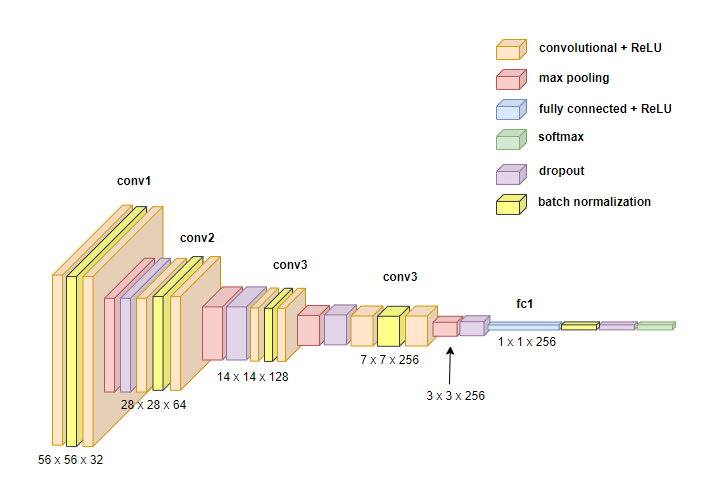

_Figure 1_

## Training
The model has been trained using the 'train' addNIST data provided and validated using the 'validate' addNIST data.

A batch size of 200 has been used because it offered the best accuracy results after comparisons of batch sizes ranging from 30 to 300.

The model has been trained using the 'train' addNIST data provided and validated using the 'validate' addNIST data.
A batch size of 200 has been used because it offered the best accuracy results after comparisons of batch sizes ranging from 30 to 300.

The number of epochs for training has been set at 35. This number of epochs has been picked following a trial-and-error process to find the optimum number of epochs to get the best performance, while not increasing training time too much. The number of epochs has been picked this way, and not using Keras' callbacks API, because the early stopping callbacks proved ineffective for this model as it was hard to fine-tune the patience of the callback, so that it would find the optimal epoch, e.g. it would stop too early or too late.

## Results
The model provided the following results when evaluating using the addNIST test data:
- Test loss: 0.12170794606208801
- Test accuracy 0.9775999784469604
- Test precision 0.9794486165046692
- Test recall 0.9769999980926514
- Test F1 score 0.9782227749987361

## Evaluating the results
Accuracy was picked as the metric of success for this model because it is often one of the best metrics of success for a classification model where there is a good distribution of data across the different classes, as is the case for the addNIST dataset.

Given the accuracy provided, we can say that the model provides an effective means of classifying the addNIST dataset, as the model's prediction accuracy approaches 100%. However, improvements are likely possible but could not be found during the development of this notebook.

## Conclusion
This model provided a slightly lower accuracy score than that provided by the solution for Task-1. That might lead to a conclusion that splitting out the addNIST images is, while a more intensive data-engineering process, is a better solution. However, it could also be concluded that there is some inefficiency in the model provided in this notebook which has been overlooked during development. In either case, this report will conclude that the model is an effective classifier for the addNIST dataset.

## Credits
Code for charts that show training accuracy, training loss and confusion matrix is based upon code within CSC3831 Practical2a.ipynb